# 1 Introduction and clinical context

# 2 Defintions methods and hypotheses

# 3 Import of data and libraries

## 3.1 Import of libraries

In [6]:
#Importing basic data analyst libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


#Importing libraries for SQL querrying
import duckdb 

#time-series specific libraries
from statsmodels.tsa.seasonal import seasonal_decompose

## 3.2 Import of tables

I decided to import all the tables relevant for my analysis at this point. I will treat them as a database and later on i will look at them in detail. Now I will just import them one by one whereas querrying and cleaning comes a bit later in separate stages. I chose this approach because i find it more logically organised compared to other solutions.

###3.2.1 Importing confirmed cases table

In [10]:
df_cases = pd.read_csv('data/raw/confirmed_global.csv')

Verifying import

In [12]:
print(df_cases.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21  4/4/21  \
0        0        0        0        0  ...   56517   56572   56595   56676   
1        0        0        0        0  ...  125506  125842  126183  126531   
2        0        0        0        0  ...  117304  117429  117524  117622   
3        0        0        0        0  ...   12053   12115   12174   12231   
4        0        0        0        0  ...   22399   22467   22579   22631   

   4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  4/10/21  
0   56717   56779   56873   56943

##### ---Cases dataset imported successfully---

### 3.2.2 Importing death cases

In [15]:
df_deaths = pd.read_csv('data/raw/deaths_global.csv')

Verifying import

In [17]:
print(df_deaths.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21  4/4/21  \
0        0        0        0        0  ...    2489    2495    2496    2497   
1        0        0        0        0  ...    2241    2247    2256    2265   
2        0        0        0        0  ...    3096    3099    3102    3105   
3        0        0        0        0  ...     115     116     117     117   
4        0        0        0        0  ...     538     538     540     542   

   4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  4/10/21  
0    2508    2512    2512    2516

##### ----Deaths dataset importet successfully----

### 3.2.3 Importing recovered cases dataset

In [20]:
df_recovered = pd.read_csv('data/raw/recovered_global.csv')

In [21]:
print(df_recovered.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21  4/4/21  \
0        0        0        0        0  ...   51788   51798   51802   51885   
1        0        0        0        0  ...   91875   92500   93173   93842   
2        0        0        0        0  ...   81632   81729   81813   81896   
3        0        0        0        0  ...   11365   11401   11428   11474   
4        0        0        0        0  ...   20508   20867   20871   20879   

   4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  4/10/21  
0   51902   51928   51940   51956

##### ----Recovered dataset importet successfully!----

# 4 Inspecting cleaning and preparing datasets for melting

In this sections I will get acquianted with dataset, melt it, deal with missings and prepare it for melting

## 4.1 Inspecting cleaning and preparing the dataset with cases

### 4.1.1 Inspecting the dataset with cases

In [27]:
print(df_cases.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21  4/4/21  \
0        0        0        0        0  ...   56517   56572   56595   56676   
1        0        0        0        0  ...  125506  125842  126183  126531   
2        0        0        0        0  ...  117304  117429  117524  117622   
3        0        0        0        0  ...   12053   12115   12174   12231   
4        0        0        0        0  ...   22399   22467   22579   22631   

   4/5/21  4/6/21  4/7/21  4/8/21  4/9/21  4/10/21  
0   56717   56779   56873   56943

In [28]:
print(df_cases.shape)

(274, 449)


Shape of the dataset is 274 rows and 449 columns. 

From the first glance I see identifier columns such as province/state, Country/Relogion, Latitude and longitude. There are 449 columns where majority corresponds to individual dates within given period of time. To confirm that only date columns follow 'Long', and that there are no unexpected columns in between, I will iterate through the column names and count the columns to crosscheck whether i itterate through columns correctly.

In [31]:
count = 0
for col in df_cases:
    print(col)
    count = count + 1
    
print("the column count is: ", count)

Province/State
Country/Region
Lat
Long
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20
3/19/20
3/20/20
3/21/20
3/22/20
3/23/20
3/24/20
3/25/20
3/26/20
3/27/20
3/28/20
3/29/20
3/30/20
3/31/20
4/1/20
4/2/20
4/3/20
4/4/20
4/5/20
4/6/20
4/7/20
4/8/20
4/9/20
4/10/20
4/11/20
4/12/20
4/13/20
4/14/20
4/15/20
4/16/20
4/17/20
4/18/20
4/19/20
4/20/20
4/21/20
4/22/20
4/23/20
4/24/20
4/25/20
4/26/20
4/27/20
4/28/20
4/29/20
4/30/20
5/1/20
5/2/20
5/3/20
5/4/20
5/5/20
5/6/20
5/7/20
5/8/20
5/9/20
5/10/20
5/11/20
5/12/20
5/13/20
5/14/20
5/15/20
5/16/20
5/17/20
5/18/20
5/19/20
5/20/20
5/21/20
5/22/20
5/23/20
5/24/20
5/25/

All the respective columns  after 'Long' seem to represent individual dates and column count from the loop is in agreement with the column count from df_cases.head(). Next I need to check data types of individual columns

In [33]:
count_integer = 0
count_other_datatypes = 0
for col in df_cases:
    print(df_cases[col].dtype)
    if df_cases[col].dtype == int:
        count_integer = count_integer +1
    else:
        count_other_datatypes = count_other_datatypes + 1

print('Integer count is:', count_integer, '\n Other data types count is:', count_other_datatypes)
if count_integer == 445:
    print('All date-columns are integers!')

object
object
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int6

Loop confirmed that all date columns are formated as an integer datatype. I see that other datatypes in the dataset are objects and float. I will confirm it with command .info()

In [35]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


Verification showed exactly those datatypes i noticed  above

In [37]:
print(df_cases.describe)

<bound method NDFrame.describe of     Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
269            NaN             Vietnam  14.058324  108.277199        0   
270            NaN  West Bank and Gaza  31.952200   35.233200        0   
271            NaN               Yemen  15.552727   48.516388        0   
272            NaN              Zambia -13.133897   27.849332        0   
273            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/1/21  4/2/21  4/3/21

Describe command gives me an overview over the dataset. There are a lot of missing values in province/state. I have to investigate this variable closer. Country/region column will likely be the variable of interest and will serve us as identifier, Whereas latitute and longitude are not interesting forour analysis. Even though some viruses are known to spread better in colder or warmer climates, Cross-country comparisons in cases between the countries are not feasible because we don´t have data on people tested and countries were very different in test measures and  test equipment. In this dataset we lack the data for it. I will not check dataset with .describe(). Quick overview shows that there were 0 cases in a begining whereas number of cases began to increase and fluctuate over time.

### 4.1.2 Cleaning the dataset with cases

I am checking if there are any missing values in columns

In [41]:
df_cases.isna()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
270,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
272,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


I cannot see the whole dataset, but the output indicates that Province/state has missing values. I am going to investigate it further along with other columns

In [43]:
df_cases.isna().any()

Province/State     True
Country/Region    False
Lat                True
Long               True
1/22/20           False
                  ...  
4/6/21            False
4/7/21            False
4/8/21            False
4/9/21            False
4/10/21           False
Length: 449, dtype: bool

It seems that longitude latitude and province contain misssing values whereas dates seem to contain no missing value. I need to check my assumption.

In [45]:
df_cases.isna().any().sum()


3

There are three columns in the df_cases. They are Province/State, Lat, Long.

There are three columns in the df_cases. They are Province/State, Lat, Long.
Before I go further with cleaning and droping, want to check which column is the most pertinent one to become identifier column during melting. The two most valiable options are Province/state and Country/Region. I will extend the jupyter notebook output to contain up to 500 rows and columns which should be sufficient size to cover the entire df_cases dataframe.

In [48]:
#extending output for rows
pd.set_option('display.max_rows', 300)
#extending output for columns
pd.set_option('display.max_columns', 500)

In [49]:
df_cases[['Province/State', 'Country/Region']]

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola
5,NaN,Antigua and Barbuda
6,NaN,Argentina
7,NaN,Armenia
8,Australian Capital Territory,Australia
9,New South Wales,Australia


I confirm that column 'Province/State' is of no interest as it shows either overseas territories and provinces/states within a few countries.Contrary, Norway and Slovakia are both within Country/Region column which will become our identifier. Now I will strip the dataset from all the unneccesarry columns and rows.

In [51]:
df_cases_filtered = """
SELECT *
FROM df_cases
WHERE "Country/Region" = 'Norway' OR "Country/Region" = 'Slovakia';
"""
df_cases = duckdb.query(df_cases_filtered).to_df()

Checking whether i filtered rows correctly

In [53]:
print(df_cases.iloc[:, 1:])
type(df_cases), df_cases.shape



  Country/Region     Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0         Norway  60.472   8.4689        0        0        0        0   
1       Slovakia  48.669  19.6990        0        0        0        0   

   1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  \
0        0        0        0        0        0        0       0       0   
1        0        0        0        0        0        0       0       0   

   2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        0   

   2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   

   2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  \
0      

(pandas.core.frame.DataFrame, (2, 449))

I correctly filtered just relevant rows and transformed querried data into dataframe. There are two rows- Slovakia and Norway with number of columns(449) remained unchanged. Now I will proceed with dropping all the unneccessarry columns. namely: 
'Province/State', 
'Long', 
'Lat'

As mentioned earlier, variables lattitude and longitude are of  no value in our analysis, whereas province/state is variable indicating a region within larger countries.Countries of interest are slovakia and Norway and we have no addotional data on specific locations within those countries.

In [55]:
df_cases.drop(['Province/State', 'Long','Lat',], axis = 1, inplace = True)

Checking if there are some missing values in the dataset:
df_cases_filtered.isna()

In [57]:
df_cases.isna().any().sum()

0

I correctly dropped all the unneccessarry rows and dataset is ready to melt. But before I will do it I will prepare datasets with deaths and recovered cases.

## 4.2 Inspecting cleaning and preparing the dataset with deaths

### 4.2.1 Inspecting the dataset with deaths

In [61]:
print(df_deaths.shape)

(274, 449)


The deaths dataset has the same number of rows(274) and columns (449) as the cases dataset. its a good indication because the process of cleaning checking and extracting of data will be very simmilar.

In [63]:
print(df_deaths.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0      

Again, earlier dates indicate zero deaths whereas number of deaths towards the later period is higher and steadily increasing Whereas first five variables: 'Province/State' 'Country/Region 'Lat''Long' seem to be identical through all the datasets. I have to confirm this assumption

I am checking what datatypes exist in the dataset deaths

In [66]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 961.3+ KB


df_deaths dataset seem to have identical types  two float columns (lat, long), two object columns (Province/State Country/Region) and 445 integer(date columns). I will verify it

In [68]:
print(df_deaths['Country/Region'].dtype)
print(df_deaths['Country/Region'].dtype)
print(df_deaths['Long'].dtype)
print(df_deaths['Lat'].dtype)

object
object
float64
float64


I confirm my assumption about float and object columns, I will check the date(integer columns as well)

In [70]:
#Filtering dataset so there are only dates
df_deaths_only_date = df_deaths.iloc[:, 4:]
#Creating loop to check which type the column is
date_counter = 0
for col in df_deaths_only_date:
    print(df_deaths_only_date[col].dtype)
    date_counter +=1 

print(date_counter)
print(df_deaths_only_date.info())

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int6

I confirm that the dataset contains 445 integers! I am finished with scrutinizing the dataset with deaths and I move further to clean it.

### 4.2.2 Cleaning the dataset with deaths

I first check whether columns contain missing values

In [74]:
print(df_deaths.isna().any())
df_deaths.isna().any().sum()



Province/State     True
Country/Region    False
Lat                True
Long               True
1/22/20           False
                  ...  
4/6/21            False
4/7/21            False
4/8/21            False
4/9/21            False
4/10/21           False
Length: 449, dtype: bool


3

#I will check how many columns with missing values are present. if there are three we know they are those:
 Province/State      
 Lat       
 Long

In [76]:
df_deaths.isna().any().sum()

3

I confirm the assumption about the missing values. Now I check identifier columns

In [78]:
print(df_deaths['Province/State'],df_deaths['Country/Region'])

0                                               NaN
1                                               NaN
2                                               NaN
3                                               NaN
4                                               NaN
5                                               NaN
6                                               NaN
7                                               NaN
8                      Australian Capital Territory
9                                   New South Wales
10                               Northern Territory
11                                       Queensland
12                                  South Australia
13                                         Tasmania
14                                         Victoria
15                                Western Australia
16                                              NaN
17                                              NaN
18                                              NaN
19          

Based on the output, I will drop the Long, Lat and Province/State columns as they are of no interest for us:

In [80]:
df_deaths.drop(['Province/State', 'Long', 'Lat'], axis = 1, inplace = True)

Filtering rows with Slovakia and Norway and re-writing original dataset:

In [82]:
df_deaths.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,4,4,4,4,4,4,8,10,12,15,16,16,17,18,18,19,22,23,29,30,30,30,33,36,36,40,40,43,47,52,58,59,61,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,170,173,178,188,194,206,217,219,220,221,228,236,247,250,258,266,274,298,304,313,331,361,373,388,409,430,450,455,475,482,495,508,550,552,573,585,597,617,638,674,682,716

In [84]:
#row-filtering
df_deaths_filtered = """
SELECT * FROM df_deaths
WHERE "Country/Region" = 'Slovakia' OR "Country/Region" = 'Norway' """
#re-writing df_deaths
df_deaths = duckdb.query(df_deaths_filtered).to_df()

In [85]:

print(' The dataset has', df_deaths.isna().any().sum(), 'missings', df_deaths.shape, df_deaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 446 entries, Country/Region to 4/10/21
dtypes: int64(445), object(1)
memory usage: 7.1+ KB
 The dataset has 0 missings (2, 446) None


In [86]:
print(df_deaths)

  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0       Slovakia        0        0        0        0        0        0   
1         Norway        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   

   2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   

   2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   

   2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  \
0   

 ##### Dataset is correctly cleaned and filtered with dates as integers, identifier column som object and zero missing values.

## 4.3 Inspecting cleaning and preparing the dataset with recovered cases

### 4.3.1 Inspecting the dataset with recovered cases

In [90]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1

The dataset seems to follow the exactly same pattern as the two  datasets above.

In [92]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 449 entries, Province/State to 4/10/21
dtypes: float64(2), int64(445), object(2)
memory usage: 908.7+ KB


In [93]:
df_recovered.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/6/21              int64
4/7/21              int64
4/8/21              int64
4/9/21              int64
4/10/21             int64
Length: 449, dtype: object

Contrary to other columns variable lat is coded as an object. It doesn´t have an effect on my decision to drop it, it is just peculiar observation. Now I check whether there is  Norway and Slovakia in country/region variable.

In [95]:
#Checking country column
print(df_recovered['Country/Region'].isin(['Norway']).any())
print(df_recovered['Country/Region'].isin(['Slovakia']).any())


#Checking state column

print(df_recovered["Province/State"].isin(["Slovakia"]).any())
print(df_recovered['Province/State'].isin(['Norway']).any())

True
True
False
False


We did find both countries in Country/Region, Whereas we didnt find any of the countries of interest in Province/State. This means again that identifier will be Country/Region. I will confirm that dates are integers in subsequent code:

In [97]:
recovered_dates = df_recovered.iloc[:,4:]

In [98]:
recovered_dates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 445 entries, 1/22/20 to 4/10/21
dtypes: int64(445)
memory usage: 900.6 KB


All dates are integers

### 4.3.2 Cleaning the dataset with recovered cases

I will filter the rows dataset applying boolean mask to relevant rows and columns:

In [102]:
df_recoveredd =df_recovered[(df_recovered['Country/Region'] == 'Slovakia') | (df_recovered['Country/Region'] == 'Norway')].copy()

In [103]:
#Reassigning the new table to the old one
df_recovered = df_recoveredd
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
186,NaN,Norway,60.472,8.4689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,7,7,12,13,13,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138

I need to change row indexes. I reset them.

In [105]:
df_recovered.reset_index(drop = True, inplace = True)

Now I  drop all the irelevant columns

In [107]:
#Droping unneccessarry columns
df_recovered.drop(['Long', 'Lat', 'Province/State'], axis = 1, inplace = True)
df_recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,Norway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,7,7,12,13,13,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,813

##### -----Cleaning successfull! -----

## 4.4 Checking the tables all together

In [110]:
df_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,Norway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,15,19,25,32,56,87,108,147,176,205,400,598,702,996,1090,1221,1333,1463,1550,1746,1914,2118,2385,2621,2863,3084,3369,3755,4015,4284,4445,4641,4863,5147,5370,5550,5687,5865,6086,6086,6211,6314,6409,6525,6603,6623,6740,6896,6937,7036,7078,7156,7191,7338,7401,7463,7499,7527,7599,7660,7710,7738,7783,7809,7847,7904,7955,7996,8034,8070,8099,8105,8132,8157,8175,8196,8219,8237,8249,8257,82

In [111]:
df_deaths

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,Slovakia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,6,8,9,11,12,13,14,14,15,17,17,18,18,20,22,23,23,24,24,25,25,25,26,26,26,26,26,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,

In [112]:
df_recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,Norway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,6,6,7,7,12,13,13,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,7727,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,8138,813

All the tables seem to be correctly filtered, I confirm that by printing out datatypes in columns of respective dataframes.

In [114]:
print(df_recovered.info())
print(df_deaths.info())
print(df_cases.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 446 entries, Country/Region to 4/10/21
dtypes: int64(445), object(1)
memory usage: 7.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 446 entries, Country/Region to 4/10/21
dtypes: int64(445), object(1)
memory usage: 7.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 446 entries, Country/Region to 4/10/21
dtypes: int64(445), object(1)
memory usage: 7.1+ KB
None


All the dataframes have 445 integers(dates) and 1 object(identifier). I will finally confirm a cleanliness of dataset viewing their shape

In [116]:
print(df_recovered.shape)
print(df_deaths.shape)
print(df_cases.shape)

(2, 446)
(2, 446)
(2, 446)


All of them have two rows(Slovakia and Norway) and 446 columns out of which 445 are date columns and 1 is identifier. I confirm dataset is ready for further analysis.

# 5 Melting the datasets

## 5.1 Melting the cases dataset

Melting means that I change format of the table. Instead of having 446 columns, I want to have just three. these are:
country/region, date and number of cases.The table will be long because each date column will be listed as row twice- one for slovakia and same date for norway. 

In [121]:
df_cases = df_cases.melt(id_vars = 'Country/Region', var_name = 'date', value_name = "cases_number").copy()

Checking the table

In [123]:
df_cases

,Country/Region,date,cases_number
0,Norway,1/22/20,0
1,Slovakia,1/22/20,0
2,Norway,1/23/20,0
3,Slovakia,1/23/20,0
4,Norway,1/24/20,0
...,...,...,...
885,Slovakia,4/8/21,368470
886,Norway,4/9/21,102719
887,Slovakia,4/9/21,369393
888,Norway,4/10/21,102974


 ##### The table is melted correctly, there are 890 rows which is 455 per country this number of rows corresponds to number of date columns in the original dataset

## 5.2 Melting the deaths dataset

In [126]:
df_deaths = df_deaths.melt(id_vars = "Country/Region", var_name = 'date', value_name = 'deaths_number').copy()

Checking the table

In [128]:
df_deaths

,Country/Region,date,deaths_number
0,Slovakia,1/22/20,0
1,Norway,1/22/20,0
2,Slovakia,1/23/20,0
3,Norway,1/23/20,0
4,Slovakia,1/24/20,0
...,...,...,...
885,Norway,4/8/21,684
886,Slovakia,4/9/21,10411
887,Norway,4/9/21,684
888,Slovakia,4/10/21,10487


 ##### I confirm that columns are named correctly and shape of the table 890 x 3 is desirable.

## 5.3 Melting the dataset with recovered cases

In [131]:
df_recovered = df_recovered.melt(id_vars = "Country/Region", var_name = "date", value_name = 'recovered_number').copy()

Checking the dataframe

In [133]:
df_recovered

,Country/Region,date,recovered_number
0,Norway,1/22/20,0
1,Slovakia,1/22/20,0
2,Norway,1/23/20,0
3,Slovakia,1/23/20,0
4,Norway,1/24/20,0
...,...,...,...
885,Slovakia,4/8/21,255300
886,Norway,4/9/21,17998
887,Slovakia,4/9/21,255300
888,Norway,4/10/21,17998


I confirm that table shape matches perfectly the table shapes of recovered and cases tables. All three tables begin and finish with the same date. Lastly i check if there are any duplicates in the date columns. Each dataset should not have more than 2 duplicates of date(corresponding to 2 respective countries) in itself.

Accessing the number of duplicates for each date in each dataset(correct should be 2 for each date)

In [136]:
cases_duplicates_size = df_cases.groupby("date").size()
deaths_duplicates_size = df_deaths.groupby("date").size()
recovered_duplicates_size = df_recovered.groupby("date").size()

Checking if each date contains no more or no less than two duplicates:

In [138]:

print((cases_duplicates_size == 2).all())
print((deaths_duplicates_size == 2).all())
print((recovered_duplicates_size == 2).all())

True
True
True


 ##### Melting successfull!

# 6. Merging datasets

I will merge the datasets using "LEFT JOINs". Since the individual datasets ("df_cases", "df_deaths", "df_recovered") are already clean and perfectly aligned with 890 rows each for Norway and Slovakia over time, the final merged dataset should also retain this length (890 rows) if the joins are performed correctly.

While two simple "LEFT JOIN"s would suffice for this specific merging task, I want to demonstrate proficiency in more in-demand SQL skills for my portfolio. Therefore, I will structure these joins using a Common Table Expression (CTE) and a subquery. This approach showcases my ability to write modular, readable, and more complex SQL queries, which is a valuable skill for data analysis roles.

In [142]:
merging_query = """ WITH recovered_join  AS (SELECT 
                            "Country/Region",
                            "date", 
                            "recovered_number" 
FROM df_recovered)

SELECT c."Country/Region" AS country,
       c."date", 
       c."cases_number", 
       d."deaths_number", 
       r."recovered_number"
FROM df_cases AS c

LEFT JOIN (SELECT "deaths_number", 
                  "date", 
                  "Country/Region"
           FROM df_deaths) AS d
on c."date" = d."date" AND c."Country/Region" = d."Country/Region"
              
LEFT JOIN recovered_join AS r 
on c."date" = r."date" AND r."Country/Region" = c."Country/Region";  """

Turning query into dataframe

In [144]:
df_timeseries = duckdb.query(merging_query).to_df()
df_timeseries 

,country,date,cases_number,deaths_number,recovered_number
0,Norway,1/23/20,0,0,0
1,Slovakia,1/23/20,0,0,0
2,Norway,1/24/20,0,0,0
3,Slovakia,1/24/20,0,0,0
4,Norway,1/25/20,0,0,0
...,...,...,...,...,...
885,Slovakia,10/22/20,35330,115,8763
886,Slovakia,4/20/20,1173,13,251
887,Norway,8/10/20,9684,256,8857
888,Slovakia,8/10/20,2599,31,1866


## 6.1 Verifying integrity of the time series dataframe

Table df_timeseries  contains 890 rows and five columns which is expected outcome of merging.Finally I check missing values. if there are none it means merging was succesfull

In [147]:
print(df_timeseries .isnull().any())
print(df_timeseries.info())

country             False
date                False
cases_number        False
deaths_number       False
recovered_number    False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           890 non-null    object
 1   date              890 non-null    object
 2   cases_number      890 non-null    int64 
 3   deaths_number     890 non-null    int64 
 4   recovered_number  890 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 34.9+ KB
None


##### ----No missing values found so merging went well----
I see that date is coded as object and I need to convert it to date-time format

# 6. Date-time conversion

I pluck first row with date column first

In [151]:
df_timeseries

,country,date,cases_number,deaths_number,recovered_number
0,Norway,1/23/20,0,0,0
1,Slovakia,1/23/20,0,0,0
2,Norway,1/24/20,0,0,0
3,Slovakia,1/24/20,0,0,0
4,Norway,1/25/20,0,0,0
...,...,...,...,...,...
885,Slovakia,10/22/20,35330,115,8763
886,Slovakia,4/20/20,1173,13,251
887,Norway,8/10/20,9684,256,8857
888,Slovakia,8/10/20,2599,31,1866


In [152]:
print(type((df_timeseries.iloc[0, 1])))
print(df_timeseries.loc[0, "date"])

<class 'str'>
1/23/20


It is string format, but i need date - time format. I continue with  changing  cariable string format to date-time

In [154]:
df_timeseries["date"] = pd.to_datetime(df_timeseries["date"], format = "%m/%d/%y")

In [155]:
df_timeseries

,country,date,cases_number,deaths_number,recovered_number
0,Norway,2020-01-23,0,0,0
1,Slovakia,2020-01-23,0,0,0
2,Norway,2020-01-24,0,0,0
3,Slovakia,2020-01-24,0,0,0
4,Norway,2020-01-25,0,0,0
...,...,...,...,...,...
885,Slovakia,2020-10-22,35330,115,8763
886,Slovakia,2020-04-20,1173,13,251
887,Norway,2020-08-10,9684,256,8857
888,Slovakia,2020-08-10,2599,31,1866


looks correct but I will sort it by date and check type of date column once again.

In [157]:
print(type(df_timeseries.loc[0, "date"]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


It is date-time format! Now i sort the  dataset based on date

In [159]:
df_timeseries = df_timeseries.sort_values("date").copy()

Checking the dataframe

In [161]:
df_timeseries

,country,date,cases_number,deaths_number,recovered_number
741,Norway,2020-01-22,0,0,0
742,Slovakia,2020-01-22,0,0,0
0,Norway,2020-01-23,0,0,0
1,Slovakia,2020-01-23,0,0,0
2,Norway,2020-01-24,0,0,0
...,...,...,...,...,...
738,Slovakia,2021-04-08,368470,10322,255300
739,Norway,2021-04-09,102719,684,17998
740,Slovakia,2021-04-09,369393,10411,255300
864,Slovakia,2021-04-10,370473,10487,255300


## 6.1 Reset index of the sorted dataset

Dataset is now ordered by the date but I need to get the index right as well. I will therefore make date as an  index

In [164]:
df_timeseries.set_index("date", inplace = True)

In [165]:
df_timeseries

,country,cases_number,deaths_number,recovered_number
date,,,,
2020-01-22,Norway,0,0,0
2020-01-22,Slovakia,0,0,0
2020-01-23,Norway,0,0,0
2020-01-23,Slovakia,0,0,0
2020-01-24,Norway,0,0,0
...,...,...,...,...
2021-04-08,Slovakia,368470,10322,255300
2021-04-09,Norway,102719,684,17998
2021-04-09,Slovakia,369393,10411,255300


Checking the index

In [167]:
df_timeseries.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-23', '2020-01-23',
               '2020-01-24', '2020-01-24', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2021-04-06', '2021-04-06', '2021-04-07', '2021-04-07',
               '2021-04-08', '2021-04-08', '2021-04-09', '2021-04-09',
               '2021-04-10', '2021-04-10'],
              dtype='datetime64[ns]', name='date', length=890, freq=None)

In [168]:
df_timeseries.loc["2021-04-10",:]

,country,cases_number,deaths_number,recovered_number
date,,,,
2021-04-10,Slovakia,370473,10487,255300
2021-04-10,Norway,102974,684,17998


I can use date to access rows and dates are listed ar indexes which is desirable.
##### ---Dataset is sorted, correctly indexed and ready for explanatory data analysis(EDA)---

# 7 Explanatory data analysis

## 7.1 Exploring the  timeframe of the dataset as a whole

In [173]:
#Printing starting date
print(df_timeseries.iloc[1, :])
#Printing end date
print(df_timeseries.iloc[-1, :])

country             Slovakia
cases_number               0
deaths_number              0
recovered_number           0
Name: 2020-01-22 00:00:00, dtype: object
country             Norway
cases_number        102974
deaths_number          684
recovered_number     17998
Name: 2021-04-10 00:00:00, dtype: object


We will conduct the time series analysis within the period between the dates 2020-01-22 and 2021-04-10 which will give us almost one year and three months window to look at. This is enough time to access aspects such as Trend, Seasonality, Stationarity, Autocorrelation, Noise, Outliers, Frequency, Structural Breaks, Cyclic Patterns, Volatility. 

## 7.2 Explanatory data analysis of cases

First I check average number of cases per week

In [177]:
df_weekly_avg = (
    df_timeseries
    .groupby("country")
    .resample("W")
    .mean(numeric_only = True)
    .reset_index()
)

Index of weekly_avg table shows weeks in chronological order and under cases_number,	deaths_number, and recovered_number, we have weekly averages of those metrics per week. Now I am going to find week with the most average cases

In [179]:
#Filtering maximum average per week for Slovakia
print(df_weekly_avg[(df_weekly_avg["country"] == "Slovakia")]["cases_number"].max())
#Filtering maximum average per week for Norway
print(df_weekly_avg[(df_weekly_avg["country"] == "Norway")]["cases_number"].max())

367727.1666666667
101355.5


In [180]:
#Extracting the week with the most average cases in Slovakia
df_weekly_avg[(df_weekly_avg["country"] == "Slovakia") & (df_weekly_avg["cases_number"] >= 367726)]

,country,date,cases_number,deaths_number,recovered_number
127,Slovakia,2021-04-11,367727.166667,10275.166667,255300.0


In [181]:
#Extracting the week with the most average cases in Norway
df_weekly_avg[(df_weekly_avg["country"] == "Norway") & (df_weekly_avg["cases_number"] >= 101355)]

,country,date,cases_number,deaths_number,recovered_number
63,Norway,2021-04-11,101355.5,681.333333,17998.0


Both Norway and Slovakia had the most average cases number in the  end of the investigated period. Specifically the week 2021-04-11. Slovakia had more than three-fold more cases on average in this week(367727) compared to Norway (101355) at this point of time. While I am not calculating incident or death rates here, it's worth noting that both countries have very similar population sizes (around 5.4 million each), making this difference in raw average cases particularly striking.


Now I visualize the  COVID-19 cases in both countries  with lineplot.

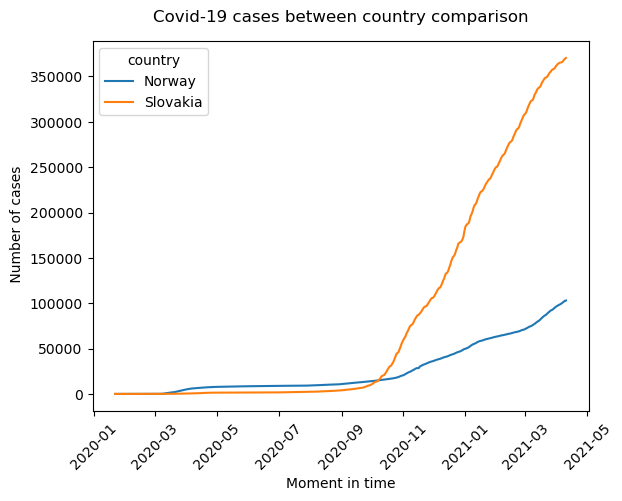

In [184]:
cases_plot = sns.lineplot(x = "date", y = "cases_number", data = df_timeseries, hue = "country")
cases_plot.set_title("Covid-19 cases between country comparison", y = 1.03)
cases_plot.set(xlabel ="Moment in time", ylabel = " Number of cases")
plt.xticks(rotation = 45)
sns.figsize = 1.5

The figure gives us a quite nice overview, but before I comment on it I will try to smoothen it out by rolling averages per week. I will use a window function in SQL to do it and i need to move the date to a column from index. In this step I will do the same thing for deaths_number and recovered_number so I will not have to do it over and over again three times. First I will reset index

In [186]:
df_timeseries.reset_index(inplace = True)
df_timeseries

,date,country,cases_number,deaths_number,recovered_number
0,2020-01-22,Norway,0,0,0
1,2020-01-22,Slovakia,0,0,0
2,2020-01-23,Norway,0,0,0
3,2020-01-23,Slovakia,0,0,0
4,2020-01-24,Norway,0,0,0
...,...,...,...,...,...
885,2021-04-08,Slovakia,368470,10322,255300
886,2021-04-09,Norway,102719,684,17998
887,2021-04-09,Slovakia,369393,10411,255300
888,2021-04-10,Slovakia,370473,10487,255300


Done!
Now I can proceed with querying a window function

In [188]:
df_rollingweek_cases = """ SELECT *, 
                               AVG(cases_number) 
                               OVER (PARTITION BY country 
                               ORDER BY date 
                               ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) 
                               AS rolling_weekly_cases, 
                           
                              AVG(deaths_number) 
                              OVER(PARTITION BY country 
                              ORDER BY date 
                              ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) 
                              AS rolling_weekly_deaths, 
                          
                              AVG(recovered_number) 
                              OVER(PARTITION BY country 
                              ORDER BY date ROWS BETWEEN 6 PRECEDING AND CURRENT ROW)
                              AS rolling_weekly_recovered 
                        FROM df_timeseries"""
df_timeseries = duckdb.query(df_rollingweek_cases).to_df()

In [189]:
df_timeseries

,date,country,cases_number,deaths_number,recovered_number,rolling_weekly_cases,rolling_weekly_deaths,rolling_weekly_recovered
0,2020-01-22,Norway,0,0,0,0.000000,0.000000,0.0
1,2020-01-23,Norway,0,0,0,0.000000,0.000000,0.0
2,2020-01-24,Norway,0,0,0,0.000000,0.000000,0.0
3,2020-01-25,Norway,0,0,0,0.000000,0.000000,0.0
4,2020-01-26,Norway,0,0,0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
885,2021-04-06,Slovakia,365733,10094,255300,364077.857143,9935.285714,255300.0
886,2021-04-07,Slovakia,366894,10243,255300,364893.428571,10010.142857,255300.0
887,2021-04-08,Slovakia,368470,10322,255300,365747.857143,10086.142857,255300.0
888,2021-04-09,Slovakia,369393,10411,255300,366536.285714,10162.428571,255300.0


All looks fine. Now I will create smoother plot

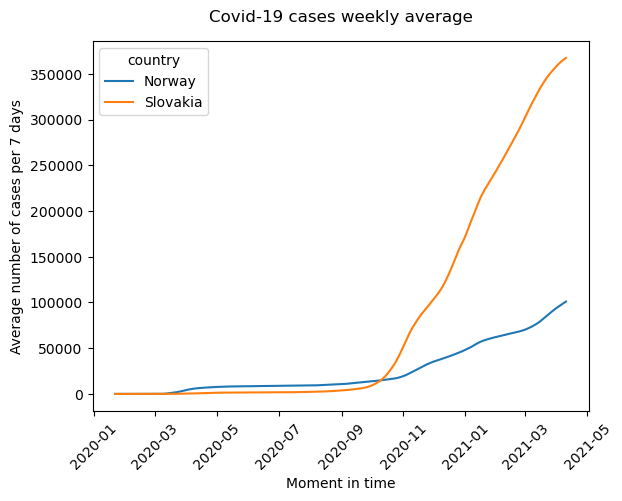

In [191]:
#Creating line-plot
weekly_cases_avg_plot = sns.lineplot(x = "date", y = "rolling_weekly_cases", data = df_timeseries, hue = "country")
#Customizing the line-plot with average cases
weekly_cases_avg_plot.set_title("Covid-19 cases weekly average", y = 1.03)
weekly_cases_avg_plot.set(xlabel ="Moment in time", ylabel = "Average number of cases per 7 days")
plt.xticks(rotation = 45)
sns.figsize = 1.5

The line plot shows that Norway had a higher number of average cases until approximately the first half of the investigated period. Around October 2021, Slovakia exceeded Norway in the number of average cases per week, and for the remainder of the period shown, Slovakia's average number of cases per week grew almost exponentially, whereas in Norway, the curve is more flattened, indicating gentler growth compared to Slovakia. I will check weekly in percentage points for both countries and volatility.

Reseting index back to date-time after querying

In [194]:
df_timeseries.set_index("date", inplace = True)
df_timeseries

,country,cases_number,deaths_number,recovered_number,rolling_weekly_cases,rolling_weekly_deaths,rolling_weekly_recovered
date,,,,,,,
2020-01-22,Norway,0,0,0,0.000000,0.000000,0.0
2020-01-23,Norway,0,0,0,0.000000,0.000000,0.0
2020-01-24,Norway,0,0,0,0.000000,0.000000,0.0
2020-01-25,Norway,0,0,0,0.000000,0.000000,0.0
2020-01-26,Norway,0,0,0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
2021-04-06,Slovakia,365733,10094,255300,364077.857143,9935.285714,255300.0
2021-04-07,Slovakia,366894,10243,255300,364893.428571,10010.142857,255300.0
2021-04-08,Slovakia,368470,10322,255300,365747.857143,10086.142857,255300.0


Now I check differences in average number of cases between the weeks in Norway

In [196]:

df_weekly_avg.set_index("date", inplace = True)
df_weekly_avg[df_weekly_avg["country"] == "Norway"]["cases_number"].pct_change() * 100

date
2020-01-26            NaN
2020-02-02            NaN
2020-02-09            NaN
2020-02-16            NaN
2020-02-23            NaN
2020-03-01            inf
2020-03-08    1402.380952
2020-03-15     725.990491
2020-03-22     140.003837
2020-03-29      91.789911
2020-04-05      48.818307
2020-04-12      21.827297
2020-04-19      10.154957
2020-04-26       7.643020
2020-05-03       4.984973
2020-05-10       3.725114
2020-05-17       2.140199
2020-05-24       1.357971
2020-05-31       1.227986
2020-06-07       1.060179
2020-06-14       1.237349
2020-06-21       1.165764
2020-06-28       1.168746
2020-07-05       1.109813
2020-07-12       0.664356
2020-07-19       0.577076
2020-07-26       0.727509
2020-08-02       1.372126
2020-08-09       3.008242
2020-08-16       3.896867
2020-08-23       3.596966
2020-08-30       3.225671
2020-09-06       5.412920
2020-09-13       6.781864
2020-09-20       6.436687
2020-09-27       6.085923
2020-10-04       5.624740
2020-10-11       7.091188
2020-10

The first entry (2020-01-26) for the percentage change is NaN because there is no preceding value to compare it to. The subsequent four entries are also NaN, indicating zero cases or no change from zero in those initial weeks. The inf (infinity) value on 2020-03-01 precisely indicates the first week where Norway recorded a non-zero number of average COVID-19 cases, leading to a division by zero in the percentage change calculation.

After these initial weeks, the weekly increase in cases stabilized, fluctuating between approximately 0 and 8 percentage points until the end of October 2020. This was followed by a period of higher fluctuation for about five subsequent weeks, with increases ranging between 11 and 19 percentage points. After the end of November 2020, the percentage point increase in cases stabilized again, generally ranging from 2% to 9% until April 2021.

In [198]:
df_weekly_avg[df_weekly_avg["country"] == "Slovakia"]["cases_number"].pct_change()*100

date
2020-01-26            NaN
2020-02-02            NaN
2020-02-09            NaN
2020-02-16            NaN
2020-02-23            NaN
2020-03-01            NaN
2020-03-08            inf
2020-03-15    3220.000000
2020-03-22     419.879518
2020-03-29      97.798378
2020-04-05      71.704745
2020-04-12      59.774821
2020-04-19      43.988896
2020-04-26      34.257749
2020-05-03       7.920027
2020-05-10       3.121801
2020-05-17       2.580645
2020-05-24       1.635220
2020-05-31       1.113861
2020-06-07       0.527257
2020-06-14       0.871031
2020-06-21       1.912721
2020-06-28       3.662536
2020-07-05       5.044823
2020-07-12       7.471553
2020-07-19       5.940054
2020-07-26       7.186949
2020-08-02       8.789250
2020-08-09       9.049660
2020-08-16      10.962783
2020-08-23      13.796156
2020-08-30      16.631579
2020-09-06      15.959033
2020-09-13      20.314033
2020-09-20      20.121505
2020-09-27      27.168212
2020-10-04      41.910479
2020-10-11      46.973648
2020-10

Similarly to Norway, Slovakia had no COVID-19 cases present until March 2020. In April 2020, the first outbreak resulted in a significant percentage point increase over the subsequent seven weeks. From mid-May to mid-July, the percentage point increase in cases did not exceed eight percentage points. However, at the beginning of August, the percentage point increase in COVID-19 cases gradually rose and peaked in mid-October, with the annual weekly percentage point increase reaching almost 52%. By mid-January 2021, the weekly increase in COVID-19 cases had dropped below a 10% threshold and gradually decreased to 1.5% in the final week of our period.

### 7.2.1 Seasonal decomposition

First I want to visualy access seasonality. From previousgraphs it seems there is no particular pattern but I will access it anyways.

reseting index of weekly df_weekly_avg so I can make seaborn figures

In [203]:
df_weekly_avg_plot = df_weekly_avg.reset_index()

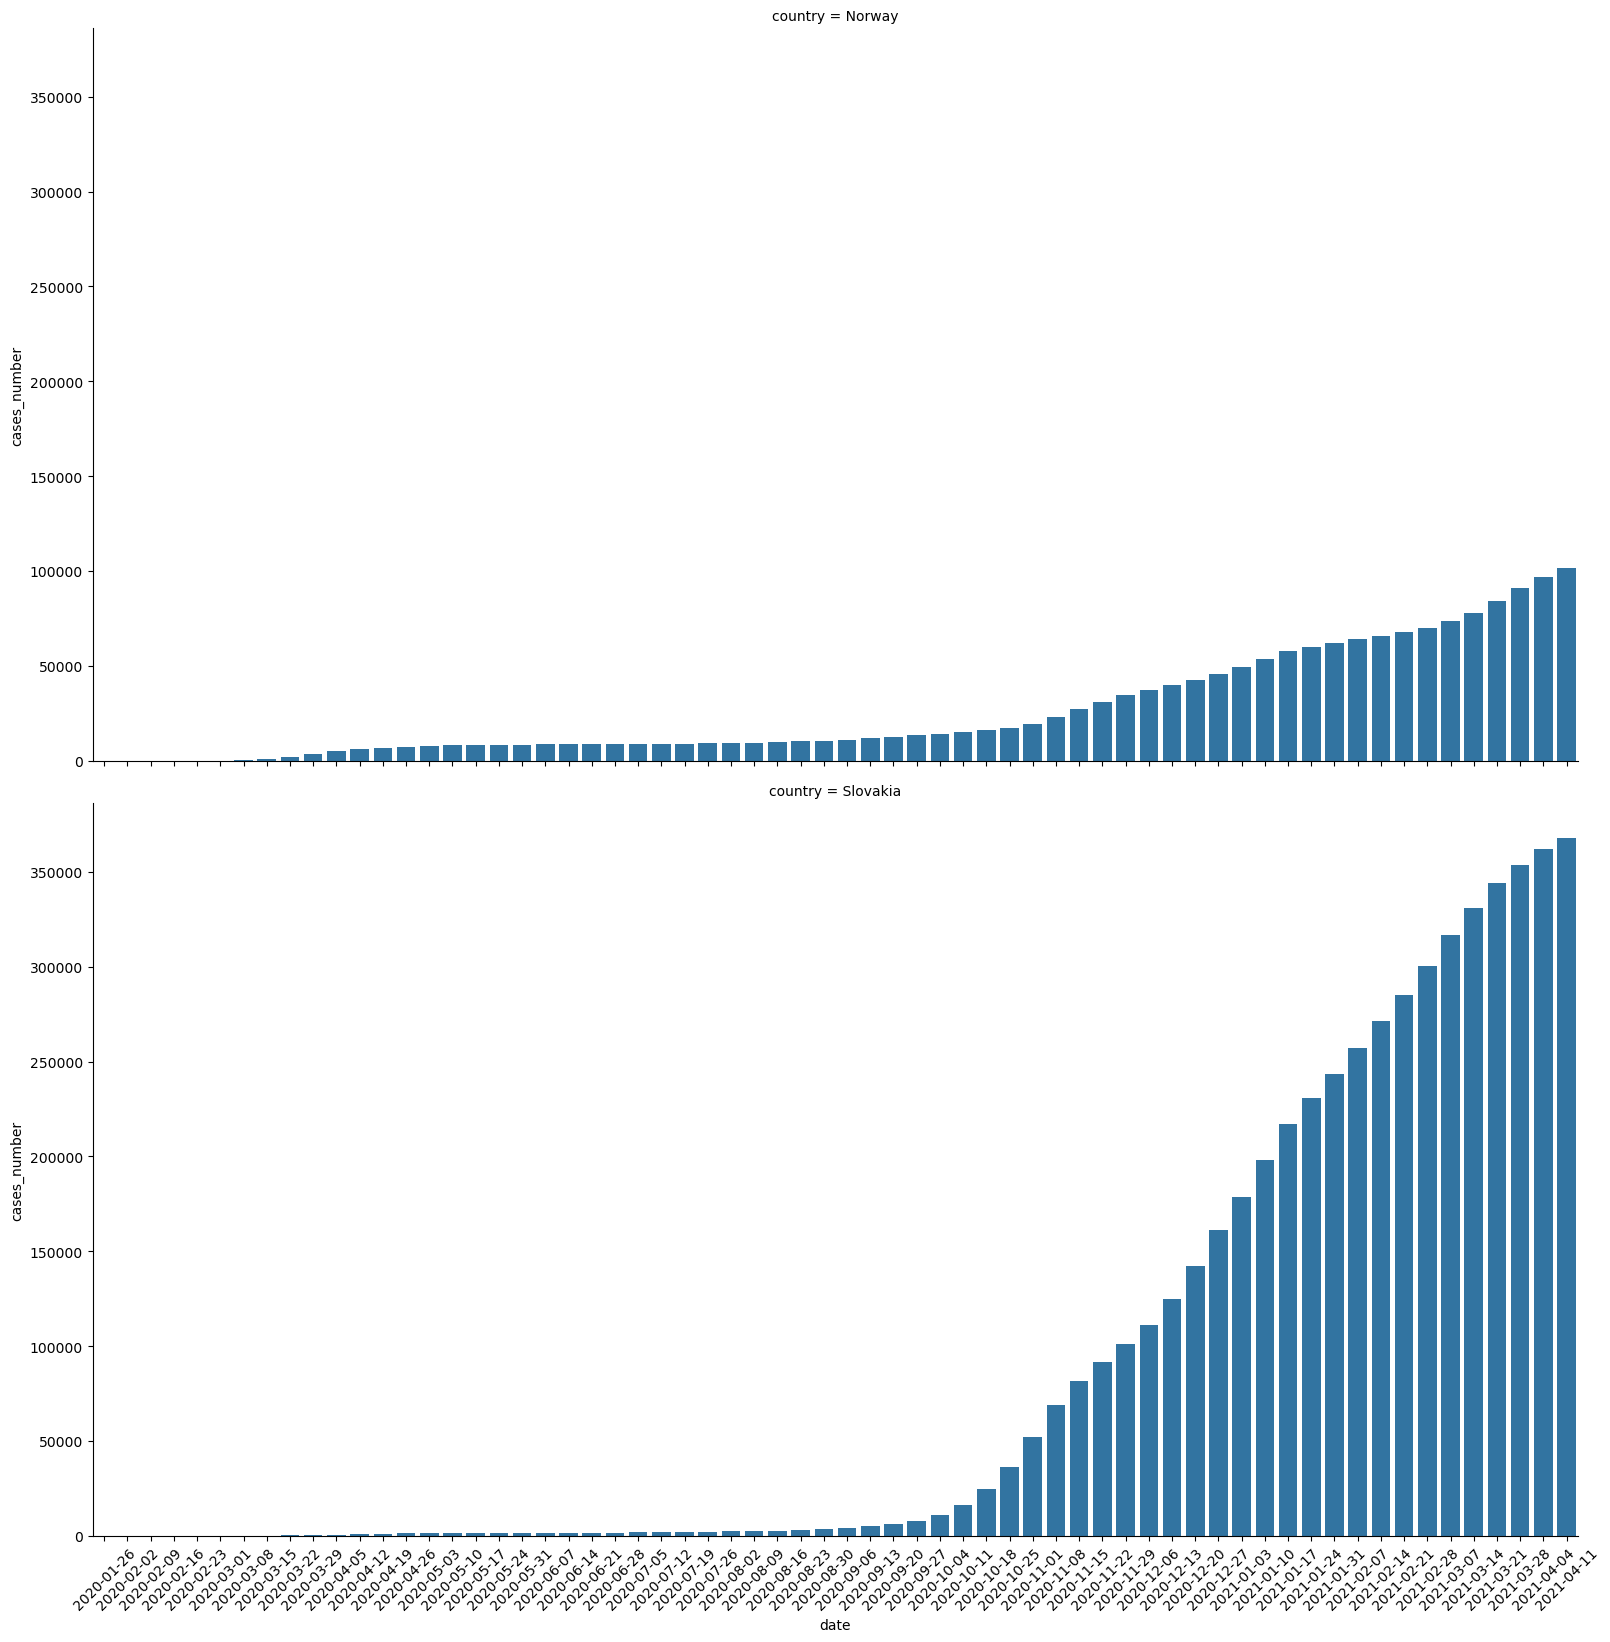

In [204]:
#Creating figures
seasonal_plot = sns.catplot(y = "cases_number", x = "date", row = "country", data = df_weekly_avg_plot, kind = "bar",    height=8, aspect=2)
#Adjusting figures
weekly_cases_avg_plot.set_title("Covid-19 cases per respective weeks", y = 1.5, x = 2.0)
weekly_cases_avg_plot.set(xlabel ="respective weeks", ylabel = "Average number of cases per respective week")
plt.xticks(rotation = 45)
sns.figsize = 2.0
plt.show()

This figure shows clear increasing trend in number of cases per week. and it seems like there is some degree of weekly seasonality.I will run seasonal decomposition per 7 days with multiplicative model.In order to run multiplicative model I have to get rid of zero values.

In [207]:
#Filtering non-zero cases days for Norway
norway_cases_nonzero = df_timeseries[(df_timeseries["country"] == "Norway") & (df_timeseries["cases_number"] != 0)]
norway_cases_nonzero

,country,cases_number,deaths_number,recovered_number,rolling_weekly_cases,rolling_weekly_deaths,rolling_weekly_recovered
date,,,,,,,
2020-02-26,Norway,1,0,0,0.142857,0.000000,0.0
2020-02-27,Norway,1,0,0,0.285714,0.000000,0.0
2020-02-28,Norway,6,0,0,1.142857,0.000000,0.0
2020-02-29,Norway,15,0,0,3.285714,0.000000,0.0
2020-03-01,Norway,19,0,0,6.000000,0.000000,0.0
...,...,...,...,...,...,...,...
2021-04-06,Norway,100149,677,17998,98062.142857,674.000000,17998.0
2021-04-07,Norway,101082,683,17998,98776.857143,675.428571,17998.0
2021-04-08,Norway,101960,684,17998,99518.285714,677.000000,17998.0


In [304]:
slovakia_cases_nonzero = df_timeseries[(df_timeseries["country"] == "Slovakia") & (df_timeseries["cases_number"] != 0)]
slovakia_cases_nonzero

,country,cases_number,deaths_number,recovered_number,rolling_weekly_cases,rolling_weekly_deaths,rolling_weekly_recovered
date,,,,,,,
2020-03-06,Slovakia,1,0,0,0.142857,0.000000,0.0
2020-03-07,Slovakia,1,0,0,0.285714,0.000000,0.0
2020-03-08,Slovakia,3,0,0,0.714286,0.000000,0.0
2020-03-09,Slovakia,3,0,0,1.142857,0.000000,0.0
2020-03-10,Slovakia,7,0,0,2.142857,0.000000,0.0
...,...,...,...,...,...,...,...
2021-04-06,Slovakia,365733,10094,255300,364077.857143,9935.285714,255300.0
2021-04-07,Slovakia,366894,10243,255300,364893.428571,10010.142857,255300.0
2021-04-08,Slovakia,368470,10322,255300,365747.857143,10086.142857,255300.0


Removing non-zeros successfull!

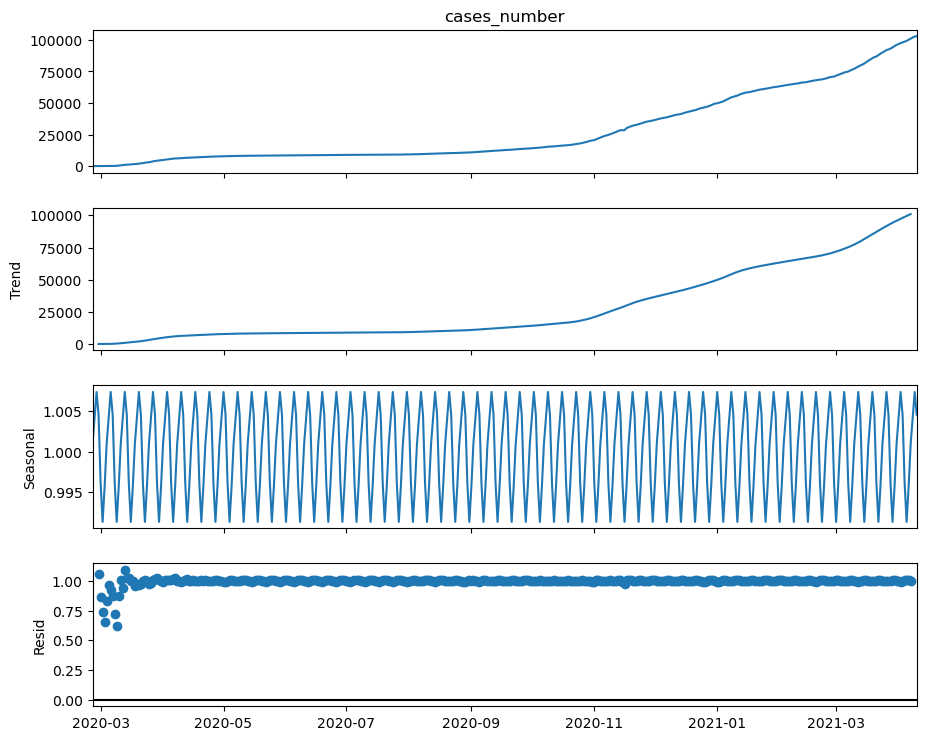

In [312]:
norway_decomposition_cases = seasonal_decompose(norway_cases_nonzero["cases_number"], model = "multiplicative", period = 7)
plot = norway_decomposition_cases.plot()
plot.set_size_inches(10,8)

Seasonal decomposition shows clear upwards trend. Seasonal pattern has clear [VVVVVVV] which signifies regular seasonal pattern.The daily variation from 0,990-1.005 means that respective days in respective 7 days periods deviated cirka 0.5 % from trend which indicates small seasonality. In combination with clear upwards trend i infer that every week the proportion of cases increases in predictable patern and increase in cases proportion is driven by an overall trend where seasonality plays marginal role. Lastly, residuals clustered around 1 for most data points indicate that the  multiplicative model has successfully captured the key trend and seasonal patterns in the data, with minimal unexplained variation or unrecognized structure remaining.